# 一价和二价拍卖

本讲座旨在为后续关于[多商品分配机制](https://python.quantecon.org/house_auction.html)的讲座做铺垫。

在那个讲座中，规划者或拍卖人同时将多个商品分配给一组人。

在本讲座中，我们将讨论如何将单个商品分配给一组人中的一个人。

我们将学习并模拟两种经典的拍卖方式：

* 第一价格密封投标拍卖(FPSB)
* 由William Vickrey创建的第二价格密封投标拍卖(SPSB) {cite}`Vickrey_61`

我们还将学习并应用：

* 收益等价定理

我们建议观看Anders Munk-Nielsen关于第二价格拍卖的视频：

```{youtube} qwWk_Bqtue8
```

以及

```{youtube} eYTGQCGpmXI
```

Anders Munk-Nielsen 将他的代码放在了[GitHub](https://github.com/GamEconCph/Lectures-2021/tree/main/Bayesian%20Games)上。

我们下面的大部分Python代码都基于他的代码。

## 第一价格密封拍卖(FPSB)

**规则：**

* 拍卖一件商品。
* 潜在买家同时提交密封投标。
* 每个投标者只知道自己的投标。
* 商品分配给出价最高的人。
* 中标者支付其投标价格。


**详细设定：**

有$n>2$个潜在买家，编号为$i = 1, 2, \ldots, n$。

买家$i$对被拍卖商品的估值为$v_i$。

买家$i$想要最大化她的预期**剩余价值**，定义为$v_i - p$，其中$p$是她在赢得拍卖的情况下需要支付的价格。

显然，

- 如果$i$的出价恰好是$v_i$，她支付的正是她认为物品值得的价格，不会获得任何剩余价值。
- 买家$i$永远不会想要出价高于$v_i$。

- 如果买家 $i$ 出价 $b < v_i$ 并赢得拍卖，她获得的剩余价值为 $b - v_i > 0$。
- 如果买家 $i$ 出价 $b < v_i$ 而其他人出价高于 $b$，买家 $i$ 就会输掉拍卖且没有剩余价值。
- 要继续进行，买家 $i$ 需要知道她的出价 $v_i$ 作为函数时赢得拍卖的概率
   - 这要求她知道其他潜在买家 $j \neq i$ 的出价 $v_j$ 的概率分布
- 根据她对该概率分布的认知，买家 $i$ 希望设定一个能最大化其剩余价值数学期望的出价。

出价是密封的，所以任何竞标者都不知道其他潜在买家提交的出价。

这意味着竞标者实际上参与的是一个玩家不知道其他玩家**收益**的博弈。

这是一个**贝叶斯博弈**，其纳什均衡被称为**贝叶斯纳什均衡**。

为了完整描述这种情况，我们假设潜在买家的估值是独立且同分布的，其概率分布为所有投标者所知。

投标者会选择低于$v_i$的最优投标价格。

### 一价密封拍卖的特征

一价密封拍卖具有唯一的对称贝叶斯纳什均衡。

买家$i$的最优投标是

$$
\mathbf{E}[y_{i} | y_{i} < v_{i}]
$$ (eq:optbid1)

其中$v_{i}$是投标者$i$的估值，$y_{i}$是所有其他投标者的最高估值：

$$
y_{i} = \max_{j \neq i} v_{j}
$$ (eq:optbid2)

关于这个论断的证明可以在维基百科的[Vickrey拍卖页面](https://en.wikipedia.org/wiki/Vickrey_auction)找到

## 二价密封拍卖(SPSB)

**规则：**在二价密封拍卖(SPSB)中，赢家支付第二高的投标价格。

## 二价密封拍卖的特征

在SPSB拍卖中，竞标者最优选择是按其真实价值出价。

形式上，在单一不可分物品的SPSB拍卖中，占优策略组合是每个竞标者按其价值出价。

关于Vickrey拍卖的证明可在[维基百科页面](https://en.wikipedia.org/wiki/Vickrey_auction)找到

## 私人价值的均匀分布

我们假设竞标者$i$的估值$v_{i}$服从分布$v_{i} \stackrel{\text{i.i.d.}}{\sim} U(0,1)$。

在这个假设下，我们可以分析计算FPSB和SPSB中出价的概率分布。

我们将模拟结果，并通过大数定律验证模拟结果与分析结果一致。

我们可以用我们的模拟来说明**收益等价定理**，该定理断言平均而言，一价和二价密封拍卖为卖家提供相同的收益。

要了解收入等价定理，请参阅[此维基百科页面](https://en.wikipedia.org/wiki/Revenue_equivalence)

## 设置

有 $n$ 个投标人。

每个投标人都知道有 $n-1$ 个其他投标人。

## 第一价格密封投标拍卖

投标人 $i$ 在**第一价格密封投标拍卖**中的最优投标由方程 {eq}`eq:optbid1` 和 {eq}`eq:optbid2` 描述。

当投标是从均匀分布中独立同分布抽取时，$y_{i}$ 的累积分布函数为

$$
\begin{aligned}
\tilde{F}_{n-1}(y) = \mathbf{P}(y_{i} \leq y) &= \mathbf{P}(\max_{j \neq i} v_{j} \leq y) \\
&= \prod_{j \neq i} \mathbf{P}(v_{j} \leq y) \\
&= y^{n-1}
\end{aligned}
$$

且 $y_i$ 的概率密度函数为 $\tilde{f}_{n-1}(y) = (n-1)y^{n-2}$。

那么投标人 $i$ 在**第一价格密封投标拍卖**中的最优投标为：

$$
\begin{aligned}
\mathbf{E}(y_{i} | y_{i} < v_{i}) &= \frac{\int_{0}^{v_{i}} y_{i}\tilde{f}_{n-1}(y_{i})dy_{i}}{\int_{0}^{v_{i}} \tilde{f}_{n-1}(y_{i})dy_{i}} \\

&= \frac{\int_{0}^{v_{i}}(n-1)y_{i}^{n-1}dy_{i}}{\int_{0}^{v_{i}}(n-1)y_{i}^{n-2}dy_{i}} \\
&= \frac{n-1}{n}y_{i}\bigg{|}_{0}^{v_{i}} \\
&= \frac{n-1}{n}v_{i}
\end{aligned}
$$

## 第二价格密封拍卖

在**第二价格密封拍卖**中，对竞价者$i$来说，出价$v_i$是最优选择。

## Python代码

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

import seaborn as sns
import scipy.stats as stats
import scipy.interpolate as interp

# 用于绘图
plt.rcParams.update({"text.usetex": True, 'font.size': 14})
colors = plt. rcParams['axes.prop_cycle'].by_key()['color']

# 确保笔记本生成相同的随机数
np.random.seed(1337)

我们重复进行一个有5个投标人的拍卖100,000次。

每个投标人的估值服从均匀分布$U(0,1)$。

In [2]:
N = 5
R = 100_000

v = np.random.uniform(0,1,(N,R))

# 第一价格密封拍卖的贝叶斯纳什均衡

b_star = lambda vi,N :((N-1)/N) * vi
b = b_star(v,N)

我们计算并排序在一价密封拍卖（FPSB）和二价密封拍卖（SPSB）下产生的出价分布。

In [3]:
idx = np.argsort(v, axis=0)  # 在每次拍卖中，竞买人的估值按升序排列。
# 我们记录这个顺序是因为我们要将其应用于出价价格和竞买人ID。

v = np.take_along_axis(v, idx, axis=0)  # 与np.sort(v, axis=0)相同，但保留了idx
b = np.take_along_axis(b, idx, axis=0)

ii = np.repeat(np.arange(1,N+1)[:,None], R, axis=1)  # 创建竞买人的ID。
ii = np.take_along_axis(ii, idx, axis=0)  # ID也按照出价价格进行排序。

winning_player = ii[-1,:] # 在FPSB和SPSB中，最高估值者为赢家。

winner_pays_fpsb = b[-1,:]  # 最高出价
winner_pays_spsb = v[-2,:]  # 第二高估值


让我们绘制_获胜_出价 $b_{(n)}$（即支付金额）与估值 $v_{(n)}$ 的关系图，分别针对FPSB和SPSB。

注意：

- FPSB：每个估值对应一个唯一的出价
- SPSB：因为支付金额等于第二高出价者的估值，即使固定获胜者的估值，支付金额也会有所变化。所以这里每个估值都对应一个支付金额的频率分布。

In [4]:
# 我们打算计算不同群组投标者的平均支付金额

binned = stats.binned_statistic(v[-1,:], v[-2,:], statistic='mean', bins=20)
xx = binned.bin_edges
xx = [(xx[ii]+xx[ii+1])/2 for ii in range(len(xx)-1)]
yy = binned.statistic

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(xx, yy, label='SPSB平均支付金额')
ax.plot(v[-1,:], b[-1,:], '--', alpha = 0.8, label = 'FPSB解析解')
ax.plot(v[-1,:], v[-2,:], 'o', alpha = 0.05, markersize = 0.1, label = 'SPSB：实际出价')

ax.legend(loc='best')
ax.set_xlabel('估值, $v_i$')
ax.set_ylabel('出价, $b_i$')
sns.despine()

Error in callback <function _draw_all_if_interactive at 0x7fd4d4233ce0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u4f30\\u503c, $v_i$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpyk20xhkb c328eddf23380f38e7bdfb2b33671f6a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./c328eddf23380f38e7bdfb2b33671f6a.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file c328eddf23380f38e7bdfb2b33671f6a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 估 (U+4F30)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 估
                   值, $v_i$}%
No pages of output.
Transcript written on tmpyk20xhkb/c328eddf23380f38e7bdfb2b33671f6a.log.




RuntimeError: latex was not able to process the following string:
b'\\u4f30\\u503c, $v_i$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpl5kirdtm c328eddf23380f38e7bdfb2b33671f6a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./c328eddf23380f38e7bdfb2b33671f6a.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file c328eddf23380f38e7bdfb2b33671f6a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 估 (U+4F30)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 估
                   值, $v_i$}%
No pages of output.
Transcript written on tmpl5kirdtm/c328eddf23380f38e7bdfb2b33671f6a.log.




<Figure size 600x400 with 1 Axes>

## 收入等价定理

我们现在从卖方预期获得的收入角度比较第一价格密封拍卖(FPSB)和第二价格密封拍卖(SPSB)。

**FPSB的预期收入：**

估值为$y$的赢家支付$\frac{n-1}{n}*y$，其中n是投标者数量。

我们之前计算得出CDF为$F_{n}(y) = y^{n}$，PDF为$f_{n} = ny^{n-1}$。

因此，预期收入为

$$
\mathbf{R} = \int_{0}^{1}\frac{n-1}{n}v_{i}\times n v_{i}^{n-1}dv_{i} = \frac{n-1}{n+1}
$$

**SPSB的预期收入：**

预期收入等于n乘以一个投标者的预期支付。

计算得出

$$
\begin{aligned}
\mathbf{TR} &= n\mathbf{E_{v_i}}\left[\mathbf{E_{y_i}}[y_{i}|y_{i} < v_{i}]\mathbf{P}(y_{i} < v_{i}) + 0\times\mathbf{P}(y_{i} > v_{i})\right] \\
&= n\mathbf{E_{v_i}}\left[\mathbf{E_{y_i}}[y_{i}|y_{i} < v_{i}]\tilde{F}_{n-1}(v_{i})\right] \\
&= n\mathbf{E_{v_i}}[\frac{n-1}{n} \times v_{i} \times v_{i}^{n-1}] \\
&= (n-1)\mathbf{E_{v_i}}[v_{i}^{n}] \\

&= \frac{n-1}{n+1}
\end{aligned}
$$

因此，虽然两种拍卖方式中的中标价格分布通常不同，但我们推断在FPSB和SPSB中的预期支付是相同的。

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

for payment,label in zip([winner_pays_fpsb, winner_pays_spsb], ['FPSB', 'SPSB']):
    print('The average payment of %s: %.4f. Std.: %.4f. Median: %.4f'% (label,payment.mean(),payment.std(),np.median(payment)))
    ax.hist(payment, density=True, alpha=0.6, label=label, bins=100)

ax.axvline(winner_pays_fpsb.mean(), ls='--', c='g', label='Mean')
ax.axvline(winner_pays_spsb.mean(), ls='--', c='r', label='Mean')

ax.legend(loc='best')
ax.set_xlabel('出价')
ax.set_ylabel('密度')
sns.despine()

The average payment of FPSB: 0.6665. Std.: 0.1129. Median: 0.6967
The average payment of SPSB: 0.6667. Std.: 0.1782. Median: 0.6862


Error in callback <function _draw_all_if_interactive at 0x7fd4d4233ce0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u51fa\\u4ef7'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp76eh2dhl 2f1c4c2e8aa4924b7abdea5e147b8035.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./2f1c4c2e8aa4924b7abdea5e147b8035.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 2f1c4c2e8aa4924b7abdea5e147b8035.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 出 (U+51FA)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 出
                   价}%
No pages of output.
Transcript written on tmp76eh2dhl/2f1c4c2e8aa4924b7abdea5e147b8035.log.




RuntimeError: latex was not able to process the following string:
b'\\u51fa\\u4ef7'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpvwffevax 2f1c4c2e8aa4924b7abdea5e147b8035.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./2f1c4c2e8aa4924b7abdea5e147b8035.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 2f1c4c2e8aa4924b7abdea5e147b8035.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 出 (U+51FA)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 出
                   价}%
No pages of output.
Transcript written on tmpvwffevax/2f1c4c2e8aa4924b7abdea5e147b8035.log.




<Figure size 600x400 with 1 Axes>

**<center>在$[0,1]$上均匀分布的FPSB和SPSB结果总结</center>**

|    密封投标拍卖    |             一价拍卖              |             二价拍卖              |
| :-----------------------: | :----------------------------------: | :-------------------------------------: |
|          获胜者           |            最高出价者             |             最高出价者              |
|        获胜者支付        |             获胜者出价             |             第二高出价              |
|        失败者支付         |                  0                   |                    0                    |
|     占优策略     |            无占优策略            |          如实出价是占优策略           |
| 贝叶斯纳什均衡 | 投标人$i$出价$\frac{n-1}{n}v_{i}$ |    投标人$i$如实出价$v_{i}$     |
|   拍卖者收益    |          $\frac {n-1}{n+1}$          |           $\frac {n-1}{n+1}$            |

**迂回：计算FPSB的贝叶斯纳什均衡**

收入等价定理让我们可以从SPSB拍卖的结果推导出FPSB拍卖的最优投标策略。

设$b(v_{i})$为FPSB拍卖中的最优出价。

收入等价定理告诉我们，价值为$v_{i}$的投标者在这两种拍卖中平均获得相同的**支付**。

因此，

$$
b(v_{i})\mathbf{P}(y_{i} < v_{i}) + 0 * \mathbf{P}(y_{i} \ge v_{i}) = \mathbf{E}_{y_{i}}[y_{i} | y_{i} < v_{i}]\mathbf{P}(y_{i} < v_{i}) + 0 * \mathbf{P}(y_{i} \ge v_{i})
$$

由此可得，FPSB拍卖中的最优投标策略是$b(v_{i}) = \mathbf{E}_{y_{i}}[y_{i} | y_{i} < v_{i}]$。

## FPSB中出价的计算

在方程{eq}`eq:optbid1`和{eq}`eq:optbid1`中，我们展示了FPSB拍卖中对称贝叶斯纳什均衡的最优出价公式。

$$
\mathbf{E}[y_{i} | y_{i} < v_{i}]
$$

其中
- $v_{i} = $ 投标者$i$的价值

- $y_{i} = $：除了竞标者$i$以外所有竞标者的最大值，即$y_{i} = \max_{j \neq i} v_{j}$

我们之前已经为私人价值呈均匀分布的情况下分析计算出了FPSB拍卖中的最优出价。

对于大多数私人价值的概率分布，解析解并不容易计算。

相反，我们可以根据私人价值的分布情况，以数值方式计算FPSB拍卖中的出价。

In [6]:
def evaluate_largest(v_hat, array, order=1):
    """
    一个用于估算其他竞标者的最大值（或特定顺序的最大值）的方法，
    条件是玩家1赢得拍卖。

    参数：
    ----------
    v_hat：float，玩家1的价值。玩家1赢得拍卖时的最大值。

    array：二维数组，形状为(N,R)的竞标者价值，
          其中N：玩家数量，R：拍卖次数

    order：int。输家中最大数的顺序。
                例如，除获胜者外最大数的顺序是1。
                     除获胜者外第二大数的顺序是2。

    """
    N,R = array.shape
    array_residual=array[1:,:].copy()  # 删除第一行，因为我们假设第一行是获胜者的出价

    index=(array_residual<v_hat).all(axis=0)
    array_conditional=array_residual[:,index].copy()

    array_conditional=np.sort(array_conditional, axis=0)
    return array_conditional[-order,:].mean()

我们可以通过将其与解析解进行比较来检验`evaluate_largest`方法的准确性。

我们发现，尽管存在小的差异，evaluate_largest方法运行良好。

此外，如果我们进行大量拍卖，比如100万次，这种差异就会消失。

In [7]:
v_grid = np.linspace(0.3,1,8)
bid_analytical = b_star(v_grid,N)
bid_simulated = [evaluate_largest(ii, v) for ii in v_grid]

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(v_grid, bid_analytical, '-', color='k', label='解析解')
ax.plot(v_grid, bid_simulated, '--', color='r', label='模拟值')

ax.legend(loc='best')
ax.set_xlabel('估值, $v_i$')
ax.set_ylabel('出价, $b_i$')
ax.set_title('FPSB的解')
sns.despine()

Error in callback <function _draw_all_if_interactive at 0x7fd4d4233ce0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u51fa\\u4ef7, $b_i$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp1h_4fv3q 79548abac7fa0f06fdc2c248d9ce6125.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./79548abac7fa0f06fdc2c248d9ce6125.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 79548abac7fa0f06fdc2c248d9ce6125.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 出 (U+51FA)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 出
                   价, $b_i$}%
No pages of output.
Transcript written on tmp1h_4fv3q/79548abac7fa0f06fdc2c248d9ce6125.log.




RuntimeError: latex was not able to process the following string:
b'\\u51fa\\u4ef7, $b_i$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpwlcnxggc 79548abac7fa0f06fdc2c248d9ce6125.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./79548abac7fa0f06fdc2c248d9ce6125.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 79548abac7fa0f06fdc2c248d9ce6125.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 出 (U+51FA)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 出
                   价, $b_i$}%
No pages of output.
Transcript written on tmpwlcnxggc/79548abac7fa0f06fdc2c248d9ce6125.log.




<Figure size 600x400 with 1 Axes>

## $\chi^2$ 分布

让我们尝试一个例子，其中私有价值的分布是一个 $\chi^2$ 分布。

我们先通过以下Python代码来了解 $\chi^2$ 分布：

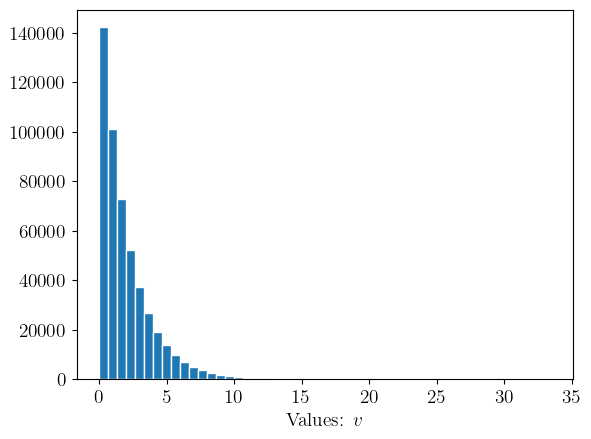

In [8]:
np.random.seed(1337)
v = np.random.chisquare(df=2, size=(N*R,))

plt.hist(v, bins=50, edgecolor='w')
plt.xlabel('Values: $v$')
plt.show()

现在我们让Python构建一个出价函数

In [9]:
np.random.seed(1337)
v = np.random.chisquare(df=2, size=(N,R))


# 我们计算v的分位数作为我们的网格
pct_quantile = np.linspace(0, 100, 101)[1:-1]
v_grid = np.percentile(v.flatten(), q=pct_quantile)

EV=[evaluate_largest(ii, v) for ii in v_grid]
# 由于缺乏观测值，某些低分位数会返回nan值

/tmp/ipykernel_7726/4273650286.py:25: RuntimeWarning: Mean of empty slice.
  return array_conditional[-order,:].mean()
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [10]:
# 我们在网格和出价函数中插入0作为补充
EV=np.insert(EV,0,0)
v_grid=np.insert(v_grid,0,0)

b_star_num = interp.interp1d(v_grid, EV, fill_value="extrapolate")

我们通过计算和可视化结果来检验我们的出价函数。

In [11]:
pct_quantile_fine = np.linspace(0, 100, 1001)[1:-1]
v_grid_fine = np.percentile(v.flatten(), q=pct_quantile_fine)

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(v_grid, EV, 'or', label='网格上的模拟')
ax.plot(v_grid_fine, b_star_num(v_grid_fine) , '-', label='插值解')

ax.legend(loc='best')
ax.set_xlabel('估值, $v_i$')
ax.set_ylabel('一价密封拍卖中的最优出价')
sns.despine()

Error in callback <function _draw_all_if_interactive at 0x7fd4d4233ce0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u4f30\\u503c, $v_i$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpe0c7ac87 c328eddf23380f38e7bdfb2b33671f6a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./c328eddf23380f38e7bdfb2b33671f6a.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file c328eddf23380f38e7bdfb2b33671f6a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 估 (U+4F30)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 估
                   值, $v_i$}%
No pages of output.
Transcript written on tmpe0c7ac87/c328eddf23380f38e7bdfb2b33671f6a.log.




RuntimeError: latex was not able to process the following string:
b'\\u4f30\\u503c, $v_i$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpfzswgulo c328eddf23380f38e7bdfb2b33671f6a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./c328eddf23380f38e7bdfb2b33671f6a.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file c328eddf23380f38e7bdfb2b33671f6a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 估 (U+4F30)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 估
                   值, $v_i$}%
No pages of output.
Transcript written on tmpfzswgulo/c328eddf23380f38e7bdfb2b33671f6a.log.




<Figure size 600x400 with 1 Axes>

现在我们可以使用Python来计算中标者支付价格的概率分布

In [12]:
b=b_star_num(v)

idx = np.argsort(v, axis=0)
v = np.take_along_axis(v, idx, axis=0)  # 与np.sort(v, axis=0)相同，但保留了idx
b = np.take_along_axis(b, idx, axis=0)

ii = np.repeat(np.arange(1,N+1)[:,None], R, axis=1)
ii = np.take_along_axis(ii, idx, axis=0)

winning_player = ii[-1,:]

winner_pays_fpsb = b[-1,:]  # 最高出价
winner_pays_spsb = v[-2,:]  # 第二高估值

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

for payment,label in zip([winner_pays_fpsb, winner_pays_spsb], ['FPSB', 'SPSB']):
    print('%s的平均支付额：%.4f。标准差：%.4f。中位数：%.4f'% (label,payment.mean(),payment.std(),np.median(payment)))
    ax.hist(payment, density=True, alpha=0.6, label=label, bins=100)

ax.axvline(winner_pays_fpsb.mean(), ls='--', c='g', label='均值')
ax.axvline(winner_pays_spsb.mean(), ls='--', c='r', label='均值')

ax.legend(loc='best')
ax.set_xlabel('出价')
ax.set_ylabel('密度')
sns.despine()

FPSB的平均支付额：2.5693。标准差：0.8383。中位数：2.5829
SPSB的平均支付额：2.5661。标准差：1.3580。中位数：2.3180


Error in callback <function _draw_all_if_interactive at 0x7fd4d4233ce0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u51fa\\u4ef7'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpj6j61s_7 2f1c4c2e8aa4924b7abdea5e147b8035.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./2f1c4c2e8aa4924b7abdea5e147b8035.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 2f1c4c2e8aa4924b7abdea5e147b8035.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 出 (U+51FA)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 出
                   价}%
No pages of output.
Transcript written on tmpj6j61s_7/2f1c4c2e8aa4924b7abdea5e147b8035.log.




RuntimeError: latex was not able to process the following string:
b'\\u51fa\\u4ef7'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp1qjbdxo_ 2f1c4c2e8aa4924b7abdea5e147b8035.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./2f1c4c2e8aa4924b7abdea5e147b8035.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 2f1c4c2e8aa4924b7abdea5e147b8035.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 出 (U+51FA)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 出
                   价}%
No pages of output.
Transcript written on tmp1qjbdxo_/2f1c4c2e8aa4924b7abdea5e147b8035.log.




<Figure size 600x400 with 1 Axes>

## 5 代码总结

我们将使用过的函数整合成一个Python类

In [14]:
class bid_price_solution:

    def __init__(self, array):
        """
        一个可以绘制投标者价值分布、
        计算FPSB中投标者最优投标价格
        并绘制FPSB和SPSB中赢家支付分布的类

        参数:
        ----------

        array: 投标者价值的二维数组，形状为(N,R)，
               其中N: 玩家数量, R: 拍卖次数

        """
        self.value_mat=array.copy()

        return None

    def plot_value_distribution(self):
        plt.hist(self.value_mat.flatten(), bins=50, edgecolor='w')
        plt.xlabel('价值: $v$')
        plt.show()

        return None

    def evaluate_largest(self, v_hat, order=1):
        N,R = self.value_mat.shape
        array_residual = self.value_mat[1:,:].copy()
        # 删除第一行因为我们假设第一行是赢家的投标

        index=(array_residual<v_hat).all(axis=0)
        array_conditional=array_residual[:,index].copy()

        array_conditional=np.sort(array_conditional, axis=0)

        return array_conditional[-order,:].mean()

    def compute_optimal_bid_FPSB(self):
        # 我们计算v的分位数作为网格
        pct_quantile = np.linspace(0, 100, 101)[1:-1]
        v_grid = np.percentile(self.value_mat.flatten(), q=pct_quantile)

        EV=[self.evaluate_largest(ii) for ii in v_grid]
        # 由于缺乏观察值，某些低分位数会返回nan值

        # 我们在网格和投标价格函数中插入0作为补充
        EV=np.insert(EV,0,0)
        v_grid=np.insert(v_grid,0,0)

        self.b_star_num = interp.interp1d(v_grid, EV, fill_value="extrapolate")

        pct_quantile_fine = np.linspace(0, 100, 1001)[1:-1]
        v_grid_fine = np.percentile(self.value_mat.flatten(), q=pct_quantile_fine)

        fig, ax = plt.subplots(figsize=(6, 4))

        ax.plot(v_grid, EV, 'or', label='网格上的模拟')
        ax.plot(v_grid_fine, self.b_star_num(v_grid_fine) , '-', label='插值解')

        ax.legend(loc='best')
        ax.set_xlabel('估值, $v_i$')
        ax.set_ylabel('FPSB中的最优投标')
        sns.despine()

        return None

    def plot_winner_payment_distribution(self):
        self.b = self.b_star_num(self.value_mat)

        idx = np.argsort(self.value_mat, axis=0)
        self.v = np.take_along_axis(self.value_mat, idx, axis=0)  # 与np.sort(v, axis=0)相同，但保留了idx
        self.b = np.take_along_axis(self.b, idx, axis=0)

        self.ii = np.repeat(np.arange(1,N+1)[:,None], R, axis=1)
        self.ii = np.take_along_axis(self.ii, idx, axis=0)

        winning_player = self.ii[-1,:]

        winner_pays_fpsb = self.b[-1,:]  # 最高投标
        winner_pays_spsb = self.v[-2,:]  # 第二高估值

        fig, ax = plt.subplots(figsize=(6, 4))

        for payment,label in zip([winner_pays_fpsb, winner_pays_spsb], ['FPSB', 'SPSB']):
            print('%s的平均支付: %.4f. 标准差: %.4f. 中位数: %.4f'% (label,payment.mean(),payment.std(),np.median(payment)))
            ax.hist(payment, density=True, alpha=0.6, label=label, bins=100)

        ax.axvline(winner_pays_fpsb.mean(), ls='--', c='g', label='均值')
        ax.axvline(winner_pays_spsb.mean(), ls='--', c='r', label='均值')

        ax.legend(loc='best')
        ax.set_xlabel('投标')
        ax.set_ylabel('密度')
        sns.despine()

        return None

In [15]:
np.random.seed(1337)
v = np.random.chisquare(df=2, size=(N,R))

chi_squ_case = bid_price_solution(v)

In [16]:
chi_squ_case.plot_value_distribution()

RuntimeError: latex was not able to process the following string:
b'\\u4ef7\\u503c: $v$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpz2whk8wk 6590f12b9bf474df924fd50782ac3141.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./6590f12b9bf474df924fd50782ac3141.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 6590f12b9bf474df924fd50782ac3141.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 价 (U+4EF7)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 价
                   值: $v$}%
No pages of output.
Transcript written on tmpz2whk8wk/6590f12b9bf474df924fd50782ac3141.log.




<Figure size 640x480 with 1 Axes>

In [17]:
chi_squ_case.compute_optimal_bid_FPSB()

/tmp/ipykernel_7726/1090044668.py:37: RuntimeWarning: Mean of empty slice.
  return array_conditional[-order,:].mean()
/home/runner/miniconda3/envs/quantecon/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error in callback <function _draw_all_if_interactive at 0x7fd4d4233ce0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u4f30\\u503c, $v_i$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp3jj3csdz c328eddf23380f38e7bdfb2b33671f6a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./c328eddf23380f38e7bdfb2b33671f6a.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file c328eddf23380f38e7bdfb2b33671f6a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 估 (U+4F30)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 估
                   值, $v_i$}%
No pages of output.
Transcript written on tmp3jj3csdz/c328eddf23380f38e7bdfb2b33671f6a.log.




RuntimeError: latex was not able to process the following string:
b'\\u4f30\\u503c, $v_i$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpzd9fdm7j c328eddf23380f38e7bdfb2b33671f6a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./c328eddf23380f38e7bdfb2b33671f6a.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file c328eddf23380f38e7bdfb2b33671f6a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 估 (U+4F30)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 估
                   值, $v_i$}%
No pages of output.
Transcript written on tmpzd9fdm7j/c328eddf23380f38e7bdfb2b33671f6a.log.




<Figure size 600x400 with 1 Axes>

In [18]:
chi_squ_case.plot_winner_payment_distribution()

FPSB的平均支付: 2.5693. 标准差: 0.8383. 中位数: 2.5829
SPSB的平均支付: 2.5661. 标准差: 1.3580. 中位数: 2.3180


Error in callback <function _draw_all_if_interactive at 0x7fd4d4233ce0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'\\u6295\\u6807'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpr01pjku3 8f3352703a61d773426773f6721f9903.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./8f3352703a61d773426773f6721f9903.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 8f3352703a61d773426773f6721f9903.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 投 (U+6295)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 投
                   标}%
No pages of output.
Transcript written on tmpr01pjku3/8f3352703a61d773426773f6721f9903.log.




RuntimeError: latex was not able to process the following string:
b'\\u6295\\u6807'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpla7q7z3_ 8f3352703a61d773426773f6721f9903.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./8f3352703a61d773426773f6721f9903.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 8f3352703a61d773426773f6721f9903.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character 投 (U+6295)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 {\rmfamily 投
                   标}%
No pages of output.
Transcript written on tmpla7q7z3_/8f3352703a61d773426773f6721f9903.log.




<Figure size 600x400 with 1 Axes>

## 参考文献

1. 维基百科关于FPSB的条目：https://en.wikipedia.org/wiki/First-price_sealed-bid_auction
2. 维基百科关于SPSB的条目：https://en.wikipedia.org/wiki/Vickrey_auction
3. Chandra Chekuri的算法博弈论讲义：http://chekuri.cs.illinois.edu/teaching/spring2008/Lectures/scribed/Notes20.pdf
4. Tim Salmon的ECO 4400补充讲义：关于拍卖的一切：https://s2.smu.edu/tsalmon/auctions.pdf
5. 拍卖理论-收益等价定理：https://michaellevet.wordpress.com/2015/07/06/auction-theory-revenue-equivalence-theorem/
6. 顺序统计量：https://online.stat.psu.edu/stat415/book/export/html/834